In [1]:
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist, cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from functools import partial

## Importing Data

First, we import the data and split it in a train and test set. We further split the training data of the fashion_mnist dataset into a validation and training set.

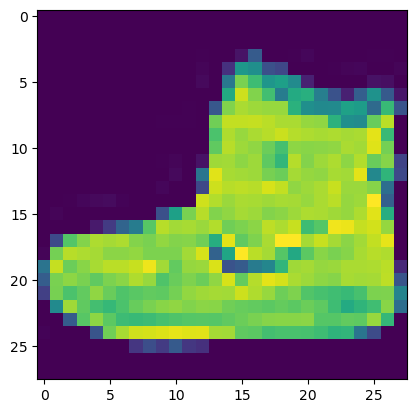

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
plt.imshow(X_train_full[0])

In [3]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(class_names[y_train_full[0]])
X_train_full.shape

Ankle boot


(60000, 28, 28)

## MLP implementation

In this section, we use a sequential model on the fashion_mnist dataset.

### Original model from book

The following code comes from the textbook, we will use this model as a starting point. Later, we will try different hyperparameters for this model.

In [54]:
model = Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])

In [55]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 300)               235500    
                                                                 
 dense_13 (Dense)            (None, 100)               30100     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [57]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2022-11-21 01:11:11.202765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.7305 - accuracy: 0.7583

2022-11-21 01:11:20.288545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 10s 5ms/step - loss: 0.7305 - accuracy: 0.7583 - val_loss: 0.5118 - val_accuracy: 0.8278
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4905 - accuracy: 0.8299 - val_loss: 0.4457 - val_accuracy: 0.8488
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4449 - accuracy: 0.8444 - val_loss: 0.4330 - val_accuracy: 0.8496
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4163 - accuracy: 0.8554 - val_loss: 0.4116 - val_accuracy: 0.8600
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3946 - accuracy: 0.8619 - val_loss: 0.3909 - val_accuracy: 0.8680
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3780 - accuracy: 0.8686 - val_loss: 0.3756 - val_accuracy: 0.8670
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3658 - accuracy: 0.8716 - val_loss: 0.3556 - val_accuracy: 0.8770
E

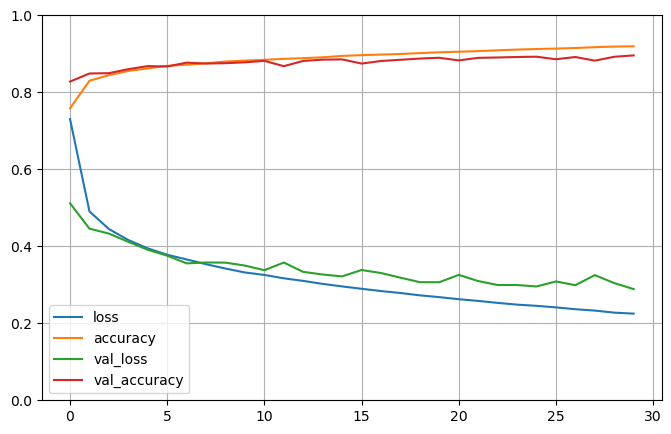

Accuracy [0.9192909002304077]


In [58]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
print("Accuracy", history.history["accuracy"][-1:])

As can be seen, the performance is not that great yet. So, we will change some hyperparameters to see how this influences the performance.

### Hyperparameter testing/tuning

In [59]:
# Extra layers
model2 = Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])

# softplus
model3 = Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="softplus"),
 keras.layers.Dense(100, activation="softplus"),
 keras.layers.Dense(10, activation="softmax")
])

# tanh and L1
model4 = Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="tanh", kernel_regularizer='l1'),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])

# sigmoid and dropout
model5 = Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="sigmoid"),
 keras.layers.Dropout(0.2),
 keras.layers.Dense(100, activation="sigmoid"),
 keras.layers.Dense(10, activation="softmax")
])

# L1 and L2
model6 = Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu", kernel_regularizer='l2'),
 keras.layers.Dense(100, activation="relu", kernel_regularizer='l1'),
 keras.layers.Dense(10, activation="softmax")
])

# L1L2
model7 = Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu", kernel_regularizer='l1_l2'),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])

In [60]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model3.compile(loss="sparse_categorical_crossentropy", optimizer="Adamax", metrics=["accuracy"])
model4.compile(loss="sparse_categorical_crossentropy", optimizer= keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])
model5.compile(loss="sparse_categorical_crossentropy", optimizer= keras.optimizers.Adam(learning_rate=0.5), metrics=["accuracy"])
model6.compile(loss="sparse_categorical_crossentropy", optimizer= keras.optimizers.SGD(learning_rate=0.01), metrics=["accuracy"])
model7.compile(loss="sparse_categorical_crossentropy", optimizer= keras.optimizers.SGD(learning_rate=0.1), metrics=["accuracy"])

In [72]:
history2 = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0035 - accuracy: 0.9999 - val_loss: 0.5726 - val_accuracy: 0.8968
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0035 - accuracy: 0.9998 - val_loss: 0.5855 - val_accuracy: 0.8978
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0038 - accuracy: 0.9998 - val_loss: 0.5920 - val_accuracy: 0.8954
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0032 - accuracy: 0.9999 - val_loss: 0.5960 - val_accuracy: 0.8974
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.5788 - val_accuracy: 0.8972
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0030 - accuracy: 0.9999 - val_loss: 0.5817 - val_accuracy: 0.8964
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.5829 - val_accuracy

In [73]:
history3 = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6096 - val_accuracy: 0.8974
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6094 - val_accuracy: 0.8982
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6100 - val_accuracy: 0.8978
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6131 - val_accuracy: 0.8978
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6149 - val_accuracy: 0.8978
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.6112 - val_accuracy: 0.8972
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.6152 - val_accuracy:

In [63]:
history4 = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0823 - accuracy: 0.9717 - val_loss: 0.3888 - val_accuracy: 0.8900
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0828 - accuracy: 0.9714 - val_loss: 0.3347 - val_accuracy: 0.9000
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0803 - accuracy: 0.9719 - val_loss: 0.3409 - val_accuracy: 0.8974
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0793 - accuracy: 0.9729 - val_loss: 0.3493 - val_accuracy: 0.8958
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0790 - accuracy: 0.9732 - val_loss: 0.3495 - val_accuracy: 0.8984
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0762 - accuracy: 0.9744 - val_loss: 0.3635 - val_accuracy: 0.8972
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0770 - accuracy: 0.9734 - val_loss: 0.3759 - val_accuracy:

In [64]:
history5 = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0477 - accuracy: 0.9849 - val_loss: 0.4158 - val_accuracy: 0.8946
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0460 - accuracy: 0.9858 - val_loss: 0.4164 - val_accuracy: 0.8970
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0482 - accuracy: 0.9841 - val_loss: 0.4335 - val_accuracy: 0.8956
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0461 - accuracy: 0.9849 - val_loss: 0.3945 - val_accuracy: 0.8996
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0448 - accuracy: 0.9856 - val_loss: 0.4059 - val_accuracy: 0.8994
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0438 - accuracy: 0.9864 - val_loss: 0.4144 - val_accuracy: 0.8966
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0442 - accuracy: 0.9856 - val_loss: 0.4436 - val_accuracy:

In [65]:
history6 = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0276 - accuracy: 0.9920 - val_loss: 0.5084 - val_accuracy: 0.8948
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0254 - accuracy: 0.9928 - val_loss: 0.4704 - val_accuracy: 0.8944
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0277 - accuracy: 0.9918 - val_loss: 0.4761 - val_accuracy: 0.8984
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0243 - accuracy: 0.9934 - val_loss: 0.4662 - val_accuracy: 0.9014
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0250 - accuracy: 0.9930 - val_loss: 0.4660 - val_accuracy: 0.8946
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0245 - accuracy: 0.9929 - val_loss: 0.5241 - val_accuracy: 0.8924
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0214 - accuracy: 0.9943 - val_loss: 0.4853 - val_accuracy:

In [66]:
history7 = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0142 - accuracy: 0.9967 - val_loss: 0.5401 - val_accuracy: 0.8924
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0109 - accuracy: 0.9979 - val_loss: 0.5210 - val_accuracy: 0.8980
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0104 - accuracy: 0.9981 - val_loss: 0.5280 - val_accuracy: 0.8982
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0110 - accuracy: 0.9979 - val_loss: 0.5326 - val_accuracy: 0.8970
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0087 - accuracy: 0.9988 - val_loss: 0.5688 - val_accuracy: 0.8938
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0099 - accuracy: 0.9981 - val_loss: 0.5299 - val_accuracy: 0.8974
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0092 - accuracy: 0.9984 - val_loss: 0.5525 - val_accu

Validation accuracies at final epoch of each model: 


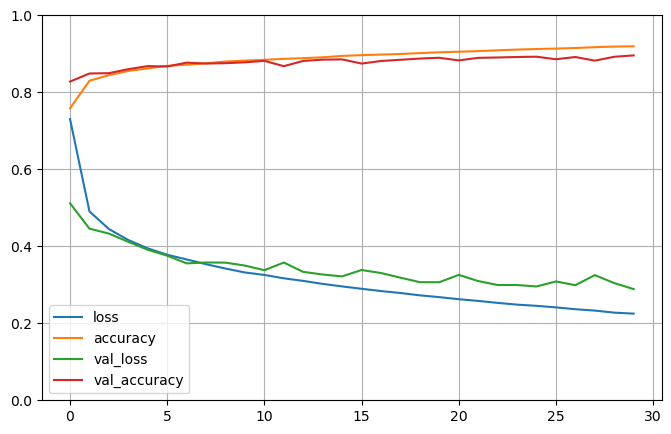

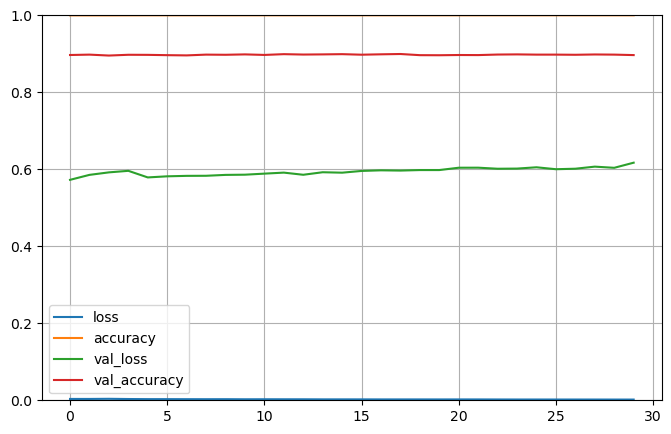

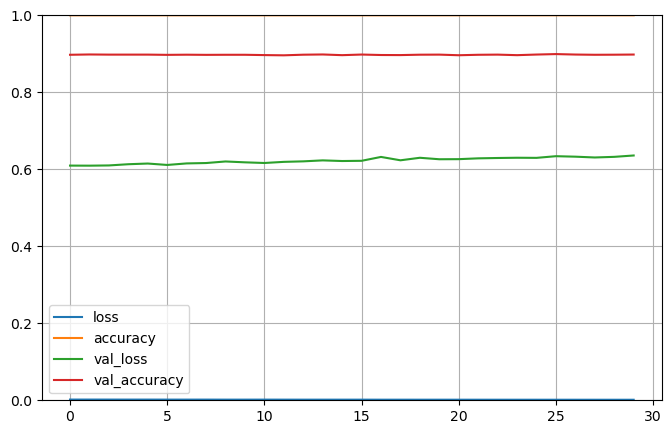

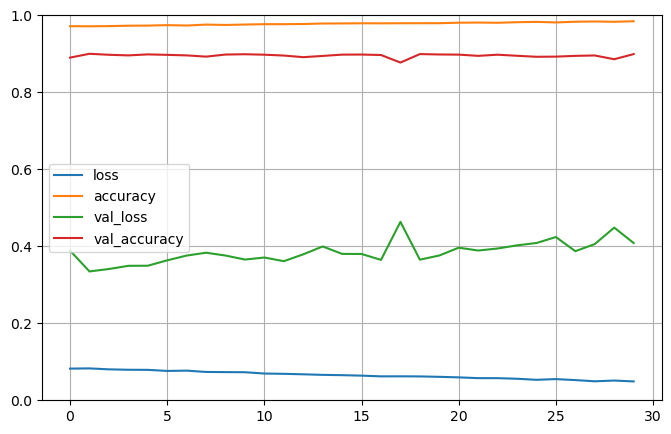

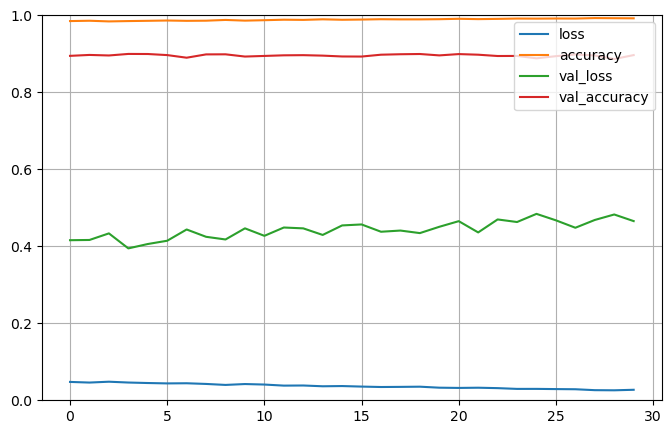

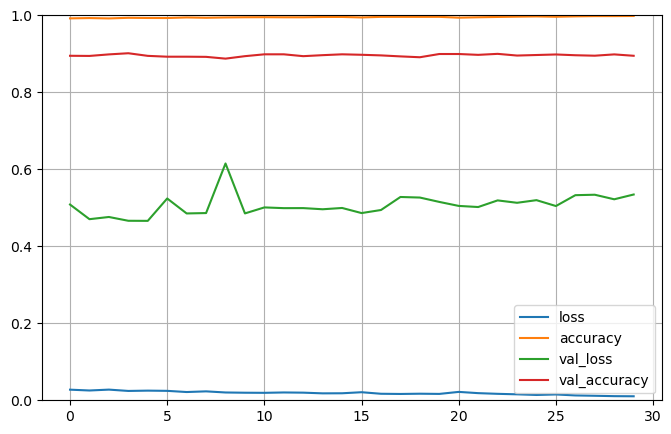

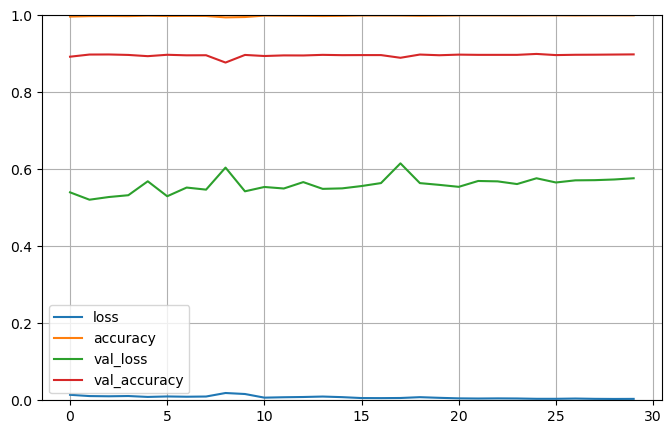

In [74]:
print('Validation accuracies at final epoch of each model: ')
for x in [history, history2, history3, history4, history5, history6, history7]:
    pd.DataFrame(x.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
    plt.show()

## CNN implementation

Next, we use a CNN on the same dataset and try out different parameters

### Original model from book

The below code shows the original model as described in the textbook. Just like before, this model is used as the base model. Using this model, we will try different hyperparameters. But now we replace it with selu instead of relu activation function.

In [5]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

cnn = keras.models.Sequential([
 DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
 keras.layers.MaxPooling2D(pool_size=2),
 DefaultConv2D(filters=128),
 DefaultConv2D(filters=128),
 keras.layers.MaxPooling2D(pool_size=2),
 DefaultConv2D(filters=256),
 DefaultConv2D(filters=256),
 keras.layers.MaxPooling2D(pool_size=2),
 keras.layers.Flatten(),
 keras.layers.Dense(units=128, activation='selu'),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(units=64, activation='selu'),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(units=10, activation='softmax'),
])

2022-11-25 02:59:08.687021: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-25 02:59:08.687721: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [6]:
cnn.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [7]:
cnnhis = cnn.fit(X_train, y_train, epochs=18, validation_data=(X_valid, y_valid))


Epoch 1/18


2022-11-25 02:59:16.581236: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-25 02:59:16.826592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 657/1719 [==========>...................] - ETA: 26s - loss: 1.1905 - accuracy: 0.5797

KeyboardInterrupt: 

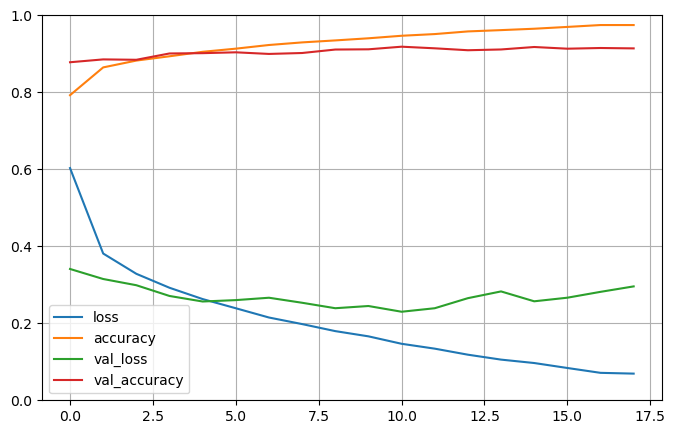

Accuracy [0.9745999574661255]
Val-Accuracy [0.9140000343322754]
Loss [0.06924889981746674]
Val-Loss [0.2958138883113861]


In [ ]:
pd.DataFrame(cnnhis.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
print("Accuracy", cnnhis.history["accuracy"][-1:])
print("Val-Accuracy", cnnhis.history["val_accuracy"][-1:])
print("Loss", cnnhis.history["loss"][-1:])
print("Val-Loss", cnnhis.history["val_loss"][-1:])

Model is overfitting, time to add regularisation.

In [8]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

cnn = keras.models.Sequential([
 DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
 keras.layers.MaxPooling2D(pool_size=2),
 DefaultConv2D(filters=128),
 DefaultConv2D(filters=128),
 keras.layers.MaxPooling2D(pool_size=2),
 DefaultConv2D(filters=256),
 DefaultConv2D(filters=256),
 keras.layers.MaxPooling2D(pool_size=2),
 keras.layers.Flatten(),
 keras.layers.Dense(units=128, activation='selu'),
 keras.layers.Dense(units=64, activation='selu', kernel_regularizer='l2'),
 keras.layers.Dense(units=10, activation='softmax'),
])

In [9]:
cnn.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 256)        

In [10]:
cnnhis = cnn.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30


2022-11-25 02:59:52.121027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 1.3437 - accuracy: 0.7399

2022-11-25 03:00:36.992246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 47s 27ms/step - loss: 1.3437 - accuracy: 0.7399 - val_loss: 0.8971 - val_accuracy: 0.8356
Epoch 2/30
1719/1719 [==============================] - 44s 26ms/step - loss: 0.7718 - accuracy: 0.8350 - val_loss: 0.6080 - val_accuracy: 0.8610
Epoch 3/30
1719/1719 [==============================] - 43s 25ms/step - loss: 0.5646 - accuracy: 0.8546 - val_loss: 0.4757 - val_accuracy: 0.8748
Epoch 4/30
1719/1719 [==============================] - 43s 25ms/step - loss: 0.4588 - accuracy: 0.8664 - val_loss: 0.4309 - val_accuracy: 0.8694
Epoch 5/30
1719/1719 [==============================] - 43s 25ms/step - loss: 0.3982 - accuracy: 0.8747 - val_loss: 0.4268 - val_accuracy: 0.8562
Epoch 6/30
1719/1719 [==============================] - 46s 27ms/step - loss: 0.3623 - accuracy: 0.8801 - val_loss: 0.3546 - val_accuracy: 0.8794
Epoch 7/30
1719/1719 [==============================] - 43s 25ms/step - loss: 0.3381 - accuracy: 0.8846 - val_loss: 0.3454 - val_accura

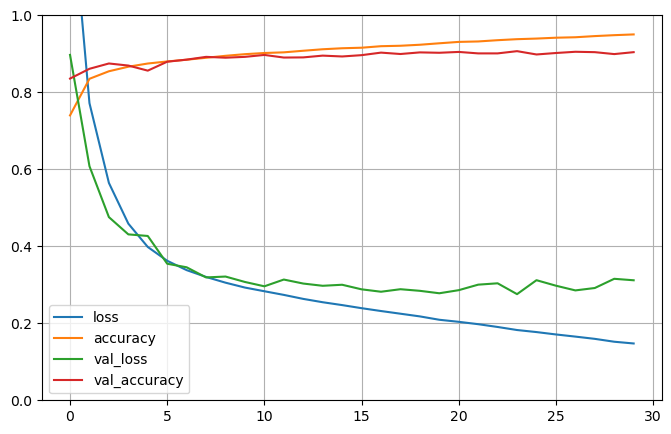

Accuracy [0.9502726793289185]
Val-Accuracy [0.90420001745224]
Loss [0.14752663671970367]
Val-Loss [0.3116989731788635]


In [11]:
pd.DataFrame(cnnhis.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
print("Accuracy", cnnhis.history["accuracy"][-1:])
print("Val-Accuracy", cnnhis.history["val_accuracy"][-1:])
print("Loss", cnnhis.history["loss"][-1:])
print("Val-Loss", cnnhis.history["val_loss"][-1:])

In [18]:
cnn.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(), metrics=["accuracy"])
cnn.summary()
cnnhis = cnn.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 256)        

2022-11-25 10:50:41.075536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.0587 - accuracy: 0.9865

2022-11-25 10:51:24.313759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 46s 26ms/step - loss: 0.0587 - accuracy: 0.9865 - val_loss: 0.4606 - val_accuracy: 0.9182
Epoch 2/3
1719/1719 [==============================] - 45s 26ms/step - loss: 0.0460 - accuracy: 0.9889 - val_loss: 0.4377 - val_accuracy: 0.9176
Epoch 3/3
1719/1719 [==============================] - 58s 34ms/step - loss: 0.0463 - accuracy: 0.9893 - val_loss: 0.4975 - val_accuracy: 0.9194


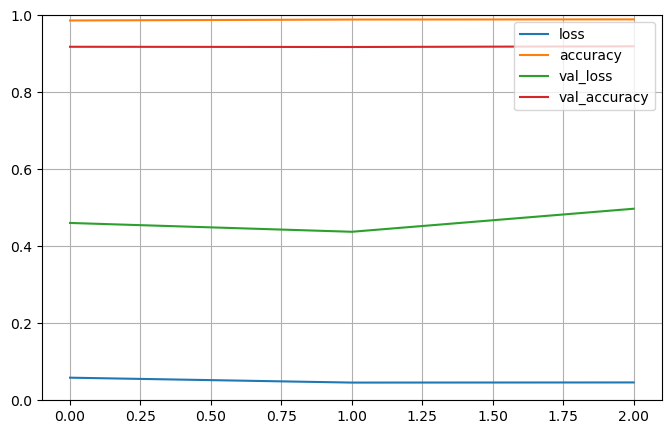

Accuracy [0.9893454313278198]
Val-Accuracy [0.9194000363349915]
Loss [0.046324990689754486]
Val-Loss [0.4975295066833496]


In [19]:
pd.DataFrame(cnnhis.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
print("Accuracy", cnnhis.history["accuracy"][-1:])
print("Val-Accuracy", cnnhis.history["val_accuracy"][-1:])
print("Loss", cnnhis.history["loss"][-1:])
print("Val-Loss", cnnhis.history["val_loss"][-1:])

# CiFAR10


In [55]:
(X_traincif, y_traincif), (X_testcif, y_testcif) = cifar10.load_data()

In [56]:
X_traincif = X_traincif/255
X_testcif = X_testcif/255
X_testcif[1][16]

array([[0.05098039, 0.05882353, 0.1372549 ],
       [0.10196078, 0.11372549, 0.18431373],
       [0.5254902 , 0.54901961, 0.59215686],
       [0.80784314, 0.84705882, 0.8627451 ],
       [0.54117647, 0.58823529, 0.58823529],
       [0.4627451 , 0.48235294, 0.48235294],
       [0.55294118, 0.52156863, 0.5254902 ],
       [0.6745098 , 0.63529412, 0.63529412],
       [0.70980392, 0.70980392, 0.70588235],
       [0.81176471, 0.81960784, 0.82745098],
       [0.8627451 , 0.87843137, 0.88235294],
       [0.89411765, 0.91764706, 0.91372549],
       [0.87843137, 0.91764706, 0.90980392],
       [0.90196078, 0.94509804, 0.94117647],
       [0.88627451, 0.93333333, 0.93333333],
       [0.69019608, 0.74117647, 0.74509804],
       [0.56470588, 0.62352941, 0.63921569],
       [0.54117647, 0.60392157, 0.63529412],
       [0.55686275, 0.61960784, 0.66666667],
       [0.56862745, 0.63921569, 0.69411765],
       [0.60392157, 0.67058824, 0.73333333],
       [0.58431373, 0.64705882, 0.71372549],
       [0.

In [57]:
print(X_traincif.shape)
X_validCif, X_trainCif = X_traincif[:5000], X_traincif[5000:]
y_validCif, y_trainCif = y_traincif[:5000], y_traincif[5000:]
print(X_validCif.shape)
print(X_trainCif.shape)

(50000, 32, 32, 3)
(5000, 32, 32, 3)
(45000, 32, 32, 3)


In [58]:
outputs = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

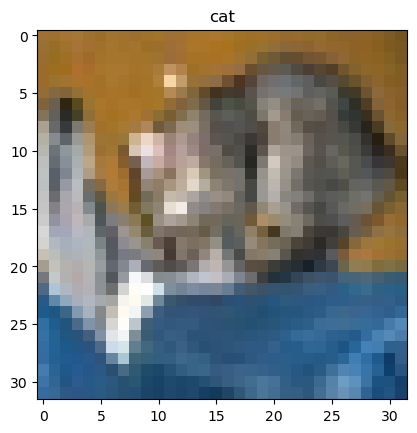

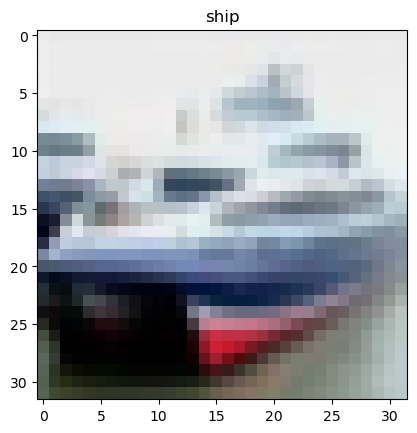

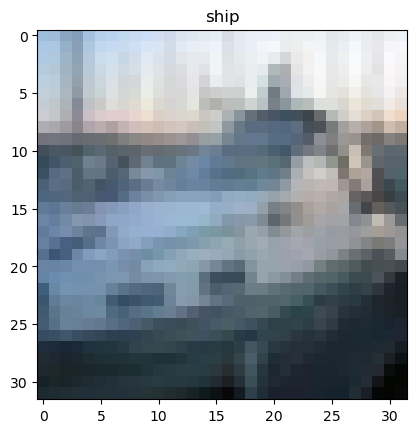

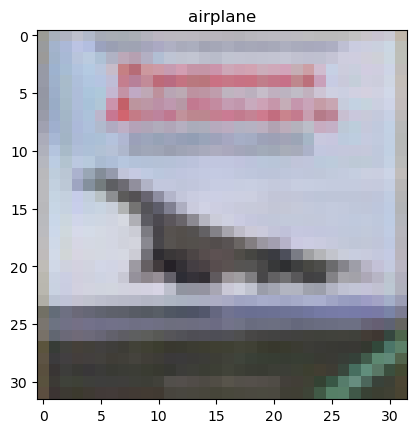

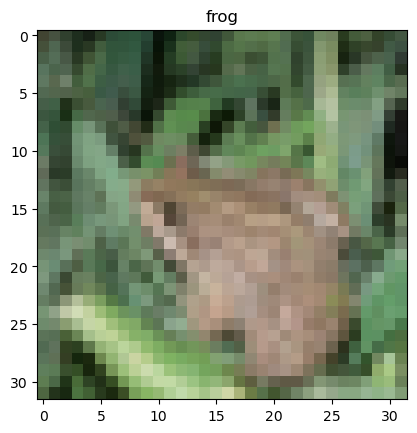

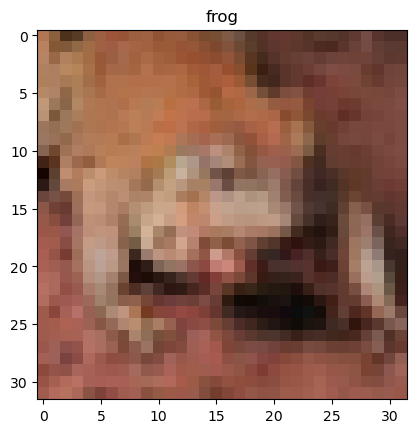

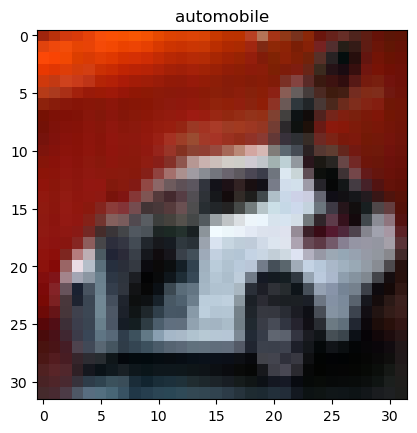

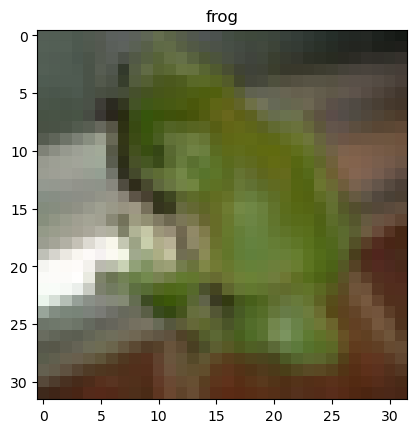

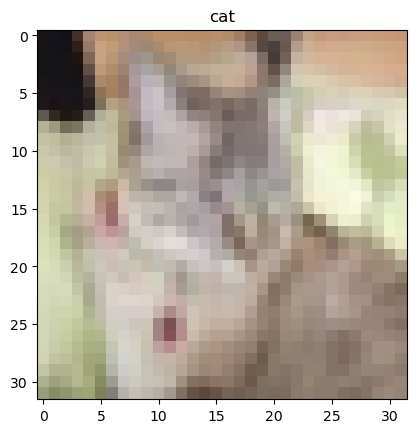

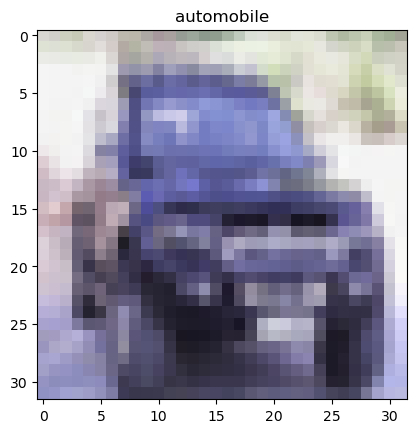

In [59]:
for t in range(10):
    plt.imshow(X_testcif[t])
    plt.title(outputs[int(y_testcif[t])])
    plt.show()

## MLP for CiFAR 10


In [25]:
model = Sequential([
 keras.layers.Flatten(input_shape=[32, 32, 3]),
 keras.layers.Dense(3072, activation="sigmoid"),
 keras.layers.Dense(1024, activation="sigmoid"),
 keras.layers.Dense(768, activation="sigmoid"),
 keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_11 (Dense)            (None, 3072)              9440256   
                                                                 
 dense_12 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_13 (Dense)            (None, 768)               787200    
                                                                 
 dense_14 (Dense)            (None, 10)                7690      
                                                                 
Total params: 13,381,898
Trainable params: 13,381,898
Non-trainable params: 0
_________________________________________________________________


In [26]:
optimizer = keras.optimizers.Adamax
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
history = model.fit(X_trainCif, y_trainCif, epochs=10, validation_data=(X_validCif, y_validCif))

Epoch 1/10


2022-11-25 01:09:25.057739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - ETA: 0s - loss: 2.0457 - accuracy: 0.2240

2022-11-25 01:09:52.781631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - 29s 20ms/step - loss: 2.0457 - accuracy: 0.2240 - val_loss: 1.9035 - val_accuracy: 0.2924
Epoch 2/10
1407/1407 [==============================] - 28s 20ms/step - loss: 1.9024 - accuracy: 0.2950 - val_loss: 1.8970 - val_accuracy: 0.3158
Epoch 3/10
1407/1407 [==============================] - 27s 19ms/step - loss: 1.8643 - accuracy: 0.3116 - val_loss: 1.8466 - val_accuracy: 0.3246
Epoch 4/10
1407/1407 [==============================] - 26s 19ms/step - loss: 1.8459 - accuracy: 0.3228 - val_loss: 1.8452 - val_accuracy: 0.3284
Epoch 5/10
1407/1407 [==============================] - 25s 18ms/step - loss: 1.8230 - accuracy: 0.3306 - val_loss: 1.7835 - val_accuracy: 0.3498
Epoch 6/10
1407/1407 [==============================] - 26s 18ms/step - loss: 1.8036 - accuracy: 0.3391 - val_loss: 1.7541 - val_accuracy: 0.3640
Epoch 7/10
1407/1407 [==============================] - 27s 19ms/step - loss: 1.7997 - accuracy: 0.3398 - val_loss: 1.8504 - val_accura

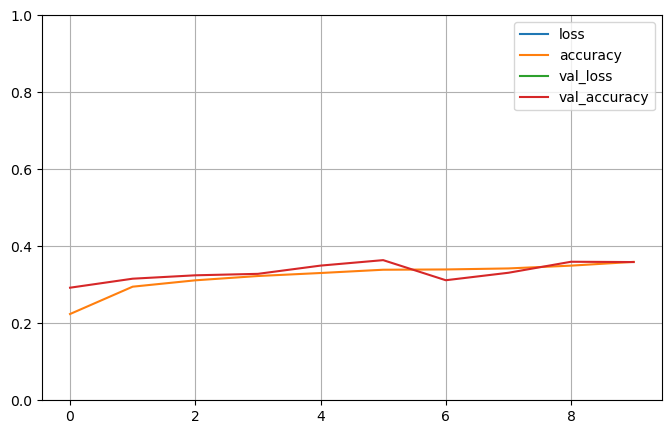

Accuracy [0.35948890447616577]
Val-Accuracy [0.359000027179718]
Loss [1.7590293884277344]
Val-Loss [1.7477558851242065]


In [28]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
print("Accuracy", history.history["accuracy"][-1:])
print("Val-Accuracy", history.history["val_accuracy"][-1:])
print("Loss", history.history["loss"][-1:])
print("Val-Loss", history.history["val_loss"][-1:])

## CNN

In [68]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

cnnModel = keras.models.Sequential([
 DefaultConv2D(filters=64, kernel_size=7, input_shape=[32, 32, 3]),
 keras.layers.MaxPooling2D(pool_size=2),
 DefaultConv2D(filters=128),
 DefaultConv2D(filters=128),
 keras.layers.MaxPooling2D(pool_size=2),
 DefaultConv2D(filters=256),
 DefaultConv2D(filters=256),
 keras.layers.MaxPooling2D(pool_size=2),
 keras.layers.Flatten(),
 keras.layers.Dense(units=1024, activation='selu'),
 keras.layers.Dense(units=64, activation='selu'),
 keras.layers.Dense(units=10, activation='softmax'),
])

cnnModel.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 32, 32, 64)        9472      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_70 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_71 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (None, 8, 8, 256)       

In [69]:
cnnModel.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [70]:
cnnHistory = cnnModel.fit(X_trainCif, y_trainCif, epochs=18, validation_data=(X_validCif, y_validCif))

Epoch 1/18


2022-11-25 14:57:57.692362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - ETA: 0s - loss: 1.7451 - accuracy: 0.3517

2022-11-25 14:58:45.713349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - 51s 35ms/step - loss: 1.7451 - accuracy: 0.3517 - val_loss: 1.5244 - val_accuracy: 0.4422
Epoch 2/18
1407/1407 [==============================] - 49s 35ms/step - loss: 1.3854 - accuracy: 0.4958 - val_loss: 1.3348 - val_accuracy: 0.5244
Epoch 3/18
1407/1407 [==============================] - 48s 34ms/step - loss: 1.2397 - accuracy: 0.5524 - val_loss: 1.1974 - val_accuracy: 0.5610
Epoch 4/18
1407/1407 [==============================] - 47s 34ms/step - loss: 1.1293 - accuracy: 0.5961 - val_loss: 1.1380 - val_accuracy: 0.5930
Epoch 5/18
1407/1407 [==============================] - 48s 34ms/step - loss: 1.0381 - accuracy: 0.6300 - val_loss: 1.0632 - val_accuracy: 0.6316
Epoch 6/18
1407/1407 [==============================] - 47s 34ms/step - loss: 0.9671 - accuracy: 0.6586 - val_loss: 1.0452 - val_accuracy: 0.6290
Epoch 7/18
1407/1407 [==============================] - 48s 34ms/step - loss: 0.8973 - accuracy: 0.6841 - val_loss: 1.0776 - val_accura

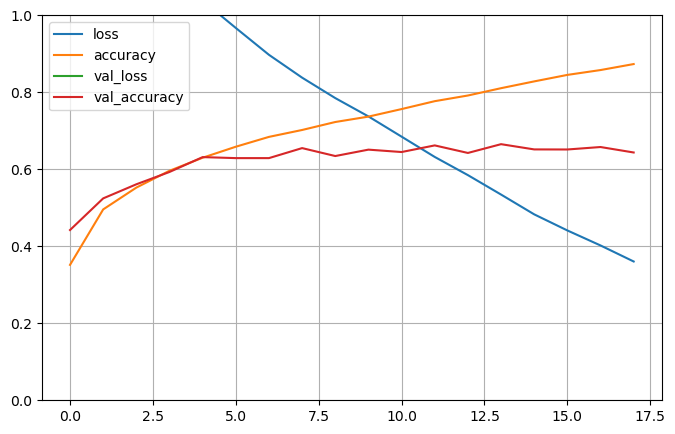

Accuracy [0.8732888698577881]
Val-Accuracy [0.6436000466346741]
Loss [0.3604962229728699]
Val-Loss [1.4787533283233643]


In [73]:
pd.DataFrame(cnnHistory.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
print("Accuracy", cnnHistory.history["accuracy"][-1:])
print("Val-Accuracy", cnnHistory.history["val_accuracy"][-1:])
print("Loss", cnnHistory.history["loss"][-1:])
print("Val-Loss", cnnHistory.history["val_loss"][-1:])

In [60]:
cnnModel.evaluate(X_testcif, y_testcif)

2022-11-25 14:34:09.339514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/traitlets/config/application.py", line 976, in launch_instance
      app.start()
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/_8/4s9qvby16_7gxg6jly778fdr0000gn/T/ipykernel_68529/334107790.py", line 1, in <module>
      cnnModel.evaluate(X_testcif, y_testcif)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/keras/engine/training.py", line 1756, in evaluate
      tmp_logs = self.test_function(iterator)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/keras/engine/training.py", line 1557, in test_function
      return step_function(self, iterator)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/keras/engine/training.py", line 1546, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/keras/engine/training.py", line 1535, in run_step
      outputs = model.test_step(data)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/keras/engine/training.py", line 1501, in test_step
      self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/keras/engine/training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/keras/losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/keras/losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/keras/losses.py", line 1860, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/keras/backend.py", line 5238, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/traitlets/config/application.py", line 976, in launch_instance
      app.start()
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/_8/4s9qvby16_7gxg6jly778fdr0000gn/T/ipykernel_68529/334107790.py", line 1, in <module>
      cnnModel.evaluate(X_testcif, y_testcif)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/keras/engine/training.py", line 1756, in evaluate
      tmp_logs = self.test_function(iterator)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/keras/engine/training.py", line 1557, in test_function
      return step_function(self, iterator)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/keras/engine/training.py", line 1546, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/keras/engine/training.py", line 1535, in run_step
      outputs = model.test_step(data)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/keras/engine/training.py", line 1501, in test_step
      self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/keras/engine/training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/keras/losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/keras/losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/keras/losses.py", line 1860, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/Users/anantashahane/IDL_dependancies/env/lib/python3.10/site-packages/keras/backend.py", line 5238, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
2 root error(s) found.
  (0) INVALID_ARGUMENT:  logits and labels must have the same first dimension, got logits shape [2048,10] and labels shape [32]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]
	 [[ArgMax/_31]]
  (1) INVALID_ARGUMENT:  logits and labels must have the same first dimension, got logits shape [2048,10] and labels shape [32]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_test_function_599145]

Well that is a lot better, but what about black and white transformed.

## Custom Architecture
I found a few architectures on google scholar to see if it works. The first one is from (https://www.researchgate.net/publication/326816043_FAWCA_A_Flexible-greedy_Approach_to_find_Well-tuned_CNN_Architecture_for_Image_Recognition_Problem)

In [64]:
cnnModel = keras.Sequential(layers=[
    keras.layers.Conv2D(filters=96, kernel_size=5, input_shape=[32, 32, 3], padding="SAME"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=80, kernel_size=5, padding="SAME"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=96, kernel_size=5, padding="SAME"),
    keras.layers.Conv2D(filters=64, kernel_size=5, padding = "SAME"),
    keras.layers.Flatten(),
    keras.layers.Dense(units=256, activation="relu"),
    keras.layers.Dense(units=10, activation="softmax")
])

cnnModel.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 32, 32, 96)        7296      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 16, 16, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 16, 16, 80)        192080    
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 8, 8, 80)         0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 8, 8, 96)          192096    
                                                                 
 conv2d_68 (Conv2D)          (None, 8, 8, 64)        

In [66]:
cnnModel.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
cnnHistory = cnnModel.fit(X_trainCif, y_trainCif, epochs=18, validation_data=(X_validCif, y_validCif))

Epoch 1/18


2022-11-25 14:38:28.512877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - ETA: 0s - loss: 2.3027 - accuracy: 0.0992

2022-11-25 14:38:57.049496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - 30s 21ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3028 - val_accuracy: 0.0976
Epoch 2/18
1407/1407 [==============================] - 30s 21ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3029 - val_accuracy: 0.0920
Epoch 3/18
1407/1407 [==============================] - 30s 21ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3028 - val_accuracy: 0.0920
Epoch 4/18
1407/1407 [==============================] - 29s 21ms/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3027 - val_accuracy: 0.0972
Epoch 5/18
1407/1407 [==============================] - 30s 21ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3028 - val_accuracy: 0.0976
Epoch 6/18
1407/1407 [==============================] - 29s 21ms/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3027 - val_accuracy: 0.0972
Epoch 7/18
1407/1407 [==============================] - 30s 21ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3029 - val_accura

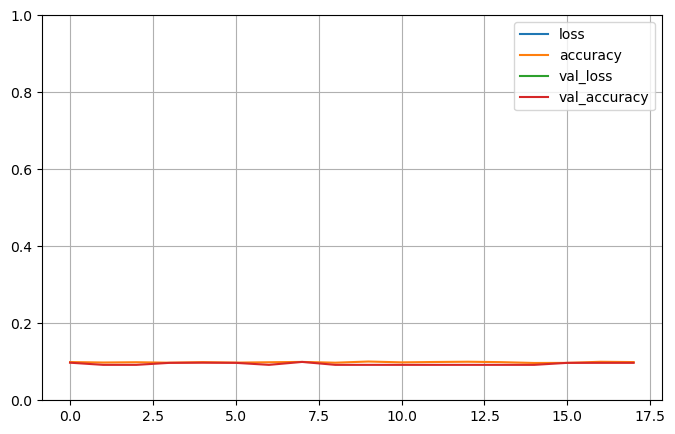

Accuracy [0.09922222048044205]
Val-Accuracy [0.09720000624656677]
Loss [2.3026976585388184]
Val-Loss [2.302726984024048]
313/313 [==============================] - 4s 11ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3025989532470703, 0.10000000149011612]

In [67]:
pd.DataFrame(cnnHistory.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
print("Accuracy", cnnHistory.history["accuracy"][-1:])
print("Val-Accuracy", cnnHistory.history["val_accuracy"][-1:])
print("Loss", cnnHistory.history["loss"][-1:])
print("Val-Loss", cnnHistory.history["val_loss"][-1:])
cnnModel.evaluate(X_testcif, y_testcif)

# Architecture 2

In [ ]:
alex = keras.Sequential([
    
])

## Testing best models on different dataset